In [1]:
!gdown 1shrKC8izdro7oX3MMCl3Q-h09Bj3XoSK

Downloading...
From: https://drive.google.com/uc?id=1shrKC8izdro7oX3MMCl3Q-h09Bj3XoSK
To: /content/penguins.csv
100% 13.8k/13.8k [00:00<00:00, 13.3MB/s]


In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('penguins.csv',sep=',',names=['island','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex','species'])

In [4]:
dataset

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,Torgersen,39.1,18.7,181.0,3750.0,male,Adelie
1,Torgersen,39.5,17.4,186.0,3800.0,female,Adelie
2,Torgersen,40.3,18.0,195.0,3250.0,female,Adelie
3,Torgersen,NaN,NaN,NaN,NaN,NaN,Adelie
4,Torgersen,36.7,19.3,193.0,3450.0,female,Adelie
...,...,...,...,...,...,...,...
339,Dream,55.8,19.8,207.0,4000.0,male,Chinstrap
340,Dream,43.5,18.1,202.0,3400.0,female,Chinstrap
341,Dream,49.6,18.2,193.0,3775.0,male,Chinstrap
342,Dream,50.8,19.0,210.0,4100.0,male,Chinstrap


## Data Loss

### Q1

In [5]:
print(f"{dataset.dropna().shape[0]} rows have no NAN value in themselves")
print(f"{dataset.shape[0] - dataset.dropna().shape[0]} rows have NAN value in themselves")

333 rows have no NAN value in themselves
11 rows have NAN value in themselves


In [6]:
print(f"Island column consists of {dataset['island'].isna().sum()} Nan.")
print(f"Bill_length_mm column consists of {dataset['bill_length_mm'].isna().sum()} Nans.")
print(f"Bill_depth_mm column consists of {dataset['bill_depth_mm'].isna().sum()} Nans.")
print(f"Flipper_length_mm  consists of {dataset['flipper_length_mm'].isna().sum()} Nans.")
print(f"Body_mass_g column consists of {dataset['body_mass_g'].isna().sum()} Nans.")
print(f"Sex column consists of {dataset['sex'].isna().sum()} Nans.")
print(f"Species column consists of {dataset['species'].isna().sum()} Nan.")

Island column consists of 0 Nan.
Bill_length_mm column consists of 2 Nans.
Bill_depth_mm column consists of 2 Nans.
Flipper_length_mm  consists of 2 Nans.
Body_mass_g column consists of 2 Nans.
Sex column consists of 11 Nans.
Species column consists of 0 Nan.


### Q2

In [7]:
print(f'rows number BEFORE removing NANs {dataset.shape[0]}.')
print(f'rows number AFTER removing Nans {dataset.dropna().shape[0]}.')

rows number BEFORE removing NANs 344.
rows number AFTER removing Nans 333.


### Q3

In [8]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [9]:
target_numeric_cols = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']

In [10]:
pipeline = ColumnTransformer(transformers=[
    ('imputer', SimpleImputer(strategy='mean'), target_numeric_cols)
], remainder='passthrough')

In [11]:
X_filled = pipeline.fit_transform(dataset)

In [12]:
temp = pd.DataFrame(X_filled, columns=['island','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex','species'])

In [13]:
target_cols = ['species','sex','island']
pipeline = ColumnTransformer(transformers=[
    ('imputer', SimpleImputer(strategy='most_frequent'), target_cols)
], remainder='passthrough')

In [14]:
X_filled = pipeline.fit_transform(temp)

In [15]:
dataset = pd.DataFrame(X_filled,columns=['species','sex','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','island'])

In [16]:
# we can see the size of droping nans without dropping them is the same
dataset.dropna().shape[0]

344

In [17]:
dataset

,species,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island
0,Adelie,male,39.1,18.7,181.0,3750.0,Torgersen
1,Adelie,female,39.5,17.4,186.0,3800.0,Torgersen
2,Adelie,female,40.3,18.0,195.0,3250.0,Torgersen
3,Adelie,male,43.92193,17.15117,200.915205,4201.754386,Torgersen
4,Adelie,female,36.7,19.3,193.0,3450.0,Torgersen
...,...,...,...,...,...,...,...
339,Chinstrap,male,55.8,19.8,207.0,4000.0,Dream
340,Chinstrap,female,43.5,18.1,202.0,3400.0,Dream
341,Chinstrap,male,49.6,18.2,193.0,3775.0,Dream
342,Chinstrap,male,50.8,19.0,210.0,4100.0,Dream


## Non numeric numbers

### Q4

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
island_label_map = {'Biscoe': 0, 'Dream': 1, 'Torgersen': 2}
sex_label_map = {'female':0,'male':1}
species_label_map = {'Adelie':0,'Chinstrap':1,'Gentoo':2}

In [20]:
le = LabelEncoder()

In [21]:
dataset['island'] = le.fit_transform(dataset['island'].map(island_label_map))
dataset['sex'] = le.fit_transform(dataset['sex'].map(sex_label_map))
dataset['species'] = le.fit_transform(dataset['species'].map(species_label_map))

In [22]:
dataset

,species,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island
0,0,1,39.1,18.7,181.0,3750.0,2
1,0,0,39.5,17.4,186.0,3800.0,2
2,0,0,40.3,18.0,195.0,3250.0,2
3,0,1,43.92193,17.15117,200.915205,4201.754386,2
4,0,0,36.7,19.3,193.0,3450.0,2
...,...,...,...,...,...,...,...
339,1,1,55.8,19.8,207.0,4000.0,1
340,1,0,43.5,18.1,202.0,3400.0,1
341,1,1,49.6,18.2,193.0,3775.0,1
342,1,1,50.8,19.0,210.0,4100.0,1


## Data augementation

### Q5



Data augmentation involves applying a set of transformations to existing training examples to create new, slightly different training examples. This can increase the size of the training set and improve the generalization of the model by reducing overfitting. Common data augmentation techniques include random rotation, shifting, cropping, flipping, and adding noise.


Flipping: This is a technique where an image is horizontally or vertically flipped. For example, if an image shows a person facing to the right, the image can be flipped to show that person facing to the left.

Rotation: This technique involves rotating an image by a certain number of degrees. Typically, small angles are used to prevent the image from losing important information.

Cropping: This technique involves cropping a portion of the image. Random crops are often used to create multiple versions of the same image.

Translation: This technique involves shifting an image in a particular direction. For example, an image of a car can be shifted to the left to create a new image of the same car.

Scaling: This technique involves resizing the image, either by making the image larger or smaller.

Noise injection: This technique involves adding random noise to the image. This can be done by adding random pixels to the image or by randomly changing the color of pixels in the image.

Color transformation: This technique involves modifying the color or brightness of the image. This can be done by shifting the hue or saturation of the image, or by adjusting the brightness or contrast.

Elastic distortion: This technique involves randomly distorting the image in a non-linear way. This can be useful in adding realistic deformations to an image.


These techniques can be used either independently or in combination with each other to create more diverse and numerous training examples for neural network models. By using these techniques, a model can gain better robustness and accuracy, as the augmented data helps the model generalize better by capturing more diverse features from the input data.

Data augmentation is not usually applied to the test set because the test set is meant to be a representative sample of the real-world data that the model will encounter at deployment time. Test data should provide an accurate evaluation of the performance of the model, and applying data augmentation to the test set would artificially inflate the size of the test set and undermine its representativeness.

Data augmentation is generally applied only to the training set to artificially increase the diversity and size of the dataset. The augmented data is introduced to the learning algorithm during the training phase to help the model generalize to new, unseen data. During testing, the model is evaluated on a separate, held-out test set that should be representative of the real-world data that the model will be applied to.

It is important to maintain a clear separation between the training, validation, and test sets during training and evaluation to ensure that the model's performance is evaluated fairly and accurately. If data augmentation techniques are used during the training or validation phase, it is crucial to ensure that the same transformations or variations are not applied to the test set.

### Q6

In deep learning, upsampling refers to the technique of increasing the resolution or size of an image or feature map. Downsampling, on the other hand, reduces the resolution or size of an image or feature map.

Upsampling can be achieved by various methods such as interpolation, transposed convolution, or nearest neighbor sampling. For example, Upsampling can increase the resolution of a low-resolution image to match the resolution of a high-resolution image in order to help the neural network better capture the fine details of the image.

Downsampling, on the other hand, can be done by max-pooling or downsampling convolutional layers. It decreases the size of input tensor or image, and thereby reducing the computational overhead of the team while accepting more generalized features.

One way to use this mixture is for semantic segmentation tasks where an image is divided into multiple segments, and each segment is assigned a particular class label. Since the number of pixels in each segment can vary widely, the dataset may suffer from class imbalance. In this case, we can use downsampling to balance the dataset and then use upsampling to restore the original size of the image.

Another approach is to use upsampling after each convolutional layer to increase the resolution of the output feature map. This can help preserve more spatial information and improve the accuracy of the model. However, this can result in a large number of parameters and high computational costs. In this case, we can use downsampling to reduce the number of parameters without compromising the performance.

In data augmentation, upsampling and downsampling are used to increase or decrease the size of the input data.

Upsampling involves increasing the size of the input data, usually by adding empty values or duplicating existing values. This can help increase the amount of data available for training and improve the accuracy of the model. Upsampling is particularly useful for datasets with class imbalance, where some classes have very few samples.

Downsampling, on the other hand, involves decreasing the size of the input data by randomly selecting a subset of the data. This can help reduce the computational cost of training the model and also prevent overfitting by reducing the complexity of the input data.

Both upsampling and downsampling can be used in a mixture to balance the dataset and create a more diverse set of training examples. This helps to produce a robust model that can generalize well to new data.

### Q7

SMOTETomek and SMOTEENN are two popular techniques in machine learning for addressing imbalanced datasets. They combine the SMOTE algorithm, which upsamples the minority class by creating synthetic examples, with either Tomek links or ENN (Edited Nearest Neighbors) to remove redundant and noisy examples.

SMOTETomek works by first applying SMOTE to oversample the minority class and then using Tomek links to remove the resulting synthetic examples that are densely surrounded by the majority class. At the same time, Tomek links also remove some of the noisy examples from both the minority and majority class, which can help improve the classification performance.

SMOTEENN works in a similar way to SMOTETomek but uses ENN instead of Tomek links. ENN first removes any misclassified examples from the training set and then uses SMOTE to oversample the minority class. The resulting synthetic examples are then placed into ENN again to remove any remaining noisy or redundant examples.

Both SMOTETomek and SMOTEENN can be effective in balancing imbalanced datasets and improving classification performance. However, in some cases, they may also remove important examples from the dataset, and it's important to compare their performance with other methods like undersampling and oversampling without a cleaning step to find the best approach for the specific problem at hand.

Therefore, the intersection between SMOTEENN and SMOTETomek is that they both use the SMOTE algorithm for oversampling. However, they use different undersampling techniques, which may result in different outcomes in terms of the subsets of data that are retained or removed. Nonetheless, both methods aim to balance the class distribution while minimizing information loss and overfitting while improving the classification performance.

### Q8

In [23]:
sex_dataset = dataset

In [24]:
sex_dataset

,species,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island
0,0,1,39.1,18.7,181.0,3750.0,2
1,0,0,39.5,17.4,186.0,3800.0,2
2,0,0,40.3,18.0,195.0,3250.0,2
3,0,1,43.92193,17.15117,200.915205,4201.754386,2
4,0,0,36.7,19.3,193.0,3450.0,2
...,...,...,...,...,...,...,...
339,1,1,55.8,19.8,207.0,4000.0,1
340,1,0,43.5,18.1,202.0,3400.0,1
341,1,1,49.6,18.2,193.0,3775.0,1
342,1,1,50.8,19.0,210.0,4100.0,1


In [25]:
# there almost balanced
sex_dataset['sex'].value_counts()

1    179
0    165
Name: sex, dtype: int64

In [26]:
# we remove 90% of 1 values randomly
# Set specific value to remove
value_to_remove = 1
# Get indices of rows that contain the value to remove
rows_to_remove = sex_dataset.index[sex_dataset['sex'] == value_to_remove]
# Calculate number of rows to remove
num_rows_to_remove = int(np.ceil(len(rows_to_remove) * 0.9))
# Drop 90% of rows that contain the value to remove
rows = np.random.choice(rows_to_remove, size=num_rows_to_remove, replace=False)
df_filtered = sex_dataset.drop(rows)

In [27]:
df_filtered['sex'].value_counts()

0    165
1     17
Name: sex, dtype: int64

In [28]:
from imblearn.combine import SMOTEENN
import pandas as pd

In [29]:
# Separate the features X and target y
X = df_filtered.drop('sex', axis=1)
y = df_filtered['sex']

# Apply SMOTEENN to increase the number of minority class samples
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Create a new DataFrame from the resampled data
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Print the count of each class in the resampled DataFrame
print(df_resampled['sex'].value_counts())

0    121
1    106
Name: sex, dtype: int64


In [30]:
from imblearn.combine import SMOTETomek
import pandas as pd

In [31]:
# Separate the target variable and the features from the DataFrame
y = df_filtered['sex']
X = df_filtered.drop('sex', axis=1)

# Upsample using SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# Concatenate the resampled data to create a new DataFrame
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Print the value counts for the target column
print(df_resampled['sex'].value_counts())

0    153
1    153
Name: sex, dtype: int64


## Normalization

### Q9

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
dataset = dataset.drop('species',axis=1)

In [34]:
normalized_dataset = dataset.copy()

In [35]:
def normalization(dataset,input_column):

  print('Original Mean:', dataset[input_column].mean())
  print('Original Variance:', dataset[input_column].var())

  scaler = StandardScaler()

  dataset[input_column] = scaler.fit_transform(dataset[[input_column]])


  print('Normalized Mean:', round(dataset[input_column].mean(),2))
  print('Normalized Variance:', round(dataset[input_column].var(),2))

In [36]:
normalization(normalized_dataset,'sex')

Original Mean: 0.5203488372093024
Original Variance: 0.25031358058173436
Normalized Mean: -0.0
Normalized Variance: 1.0


In [37]:
normalization(normalized_dataset,'island')

Original Mean: 0.6627906976744186
Original Variance: 0.527357786968608
Normalized Mean: 0.0
Normalized Variance: 1.0


In [38]:
normalization(normalized_dataset,'bill_length_mm')

Original Mean: 43.921929824561424
Original Variance: 29.633252263311338
Normalized Mean: -0.0
Normalized Variance: 1.0


In [39]:
normalization(normalized_dataset,'bill_depth_mm')

Original Mean: 17.15116959064328
Original Variance: 3.8770686068913784
Normalized Mean: 0.0
Normalized Variance: 1.0


In [40]:
normalization(normalized_dataset,'flipper_length_mm')

Original Mean: 200.91520467836258
Original Variance: 196.5788365471502
Normalized Mean: -0.0
Normalized Variance: 1.0


In [41]:
normalization(normalized_dataset,'body_mass_g')

Original Mean: 4201.754385964912
Original Variance: 639381.0418904403
Normalized Mean: 0.0
Normalized Variance: 1.0


## Principle component analysis

### Q10

In [42]:
normalized_dataset

,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island
0,0.960098,-8.870812e-01,0.787743,-1.422488,-0.565789,1.844076
1,-1.041561,-8.134940e-01,0.126556,-1.065352,-0.503168,1.844076
2,-1.041561,-6.663195e-01,0.431719,-0.422507,-1.192003,1.844076
3,0.960098,-1.307172e-15,0.000000,0.000000,0.000000,1.844076
4,-1.041561,-1.328605e+00,1.092905,-0.565361,-0.941517,1.844076
...,...,...,...,...,...,...
339,0.960098,2.185186e+00,1.347208,0.434620,-0.252683,0.465028
340,-1.041561,-7.762162e-02,0.482580,0.077484,-1.004139,0.465028
341,0.960098,1.044584e+00,0.533440,-0.565361,-0.534479,0.465028
342,0.960098,1.265345e+00,0.940324,0.648902,-0.127440,0.465028


In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=3)
# Apply PCA to the data
transformed_data = pca.fit_transform(normalized_dataset)

# Create a new DataFrame to hold the transformed data
new_df = pd.DataFrame(data=transformed_data, columns=['PCA_1', 'PCA_2','PCA_3'])

# Print the original and transformed data
print('Original Data:')
print(normalized_dataset)
print('\nTransformed Data:')
print(new_df)

Original Data:
          sex  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0    0.960098   -8.870812e-01       0.787743          -1.422488    -0.565789   
1   -1.041561   -8.134940e-01       0.126556          -1.065352    -0.503168   
2   -1.041561   -6.663195e-01       0.431719          -0.422507    -1.192003   
3    0.960098   -1.307172e-15       0.000000           0.000000     0.000000   
4   -1.041561   -1.328605e+00       1.092905          -0.565361    -0.941517   
..        ...             ...            ...                ...          ...   
339  0.960098    2.185186e+00       1.347208           0.434620    -0.252683   
340 -1.041561   -7.762162e-02       0.482580           0.077484    -1.004139   
341  0.960098    1.044584e+00       0.533440          -0.565361    -0.534479   
342  0.960098    1.265345e+00       0.940324           0.648902    -0.127440   
343 -1.041561    1.154965e+00       0.787743          -0.208225    -0.534479   

       island  
0    1.8

## Data visualization

### Q11

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

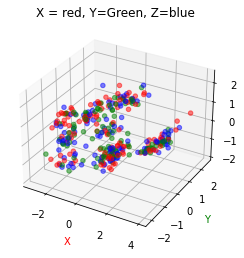

In [46]:
# Create some sample data
x = new_df['PCA_1']
y = new_df['PCA_2']
z = new_df['PCA_3']
labels = np.random.randint(0, 3, 344)

# Define colors for each class
colors = {0: 'r', 1: 'g', 2: 'b'}
color_labels = [colors[label] for label in labels]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=color_labels,alpha=0.5)

# Set axis labels and title
ax.set_xlabel('X', color='r')
ax.set_ylabel('Y', color='g')
ax.set_zlabel('Z', color='b')
plt.title('X = red, Y=Green, Z=blue')


# Show the plot
plt.show()

### Q12

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
dataset

,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island
0,1,39.1,18.7,181.0,3750.0,2
1,0,39.5,17.4,186.0,3800.0,2
2,0,40.3,18.0,195.0,3250.0,2
3,1,43.92193,17.15117,200.915205,4201.754386,2
4,0,36.7,19.3,193.0,3450.0,2
...,...,...,...,...,...,...
339,1,55.8,19.8,207.0,4000.0,1
340,0,43.5,18.1,202.0,3400.0,1
341,1,49.6,18.2,193.0,3775.0,1
342,1,50.8,19.0,210.0,4100.0,1


In [49]:
dataset.columns

Index(['sex', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island'],
      dtype='object')

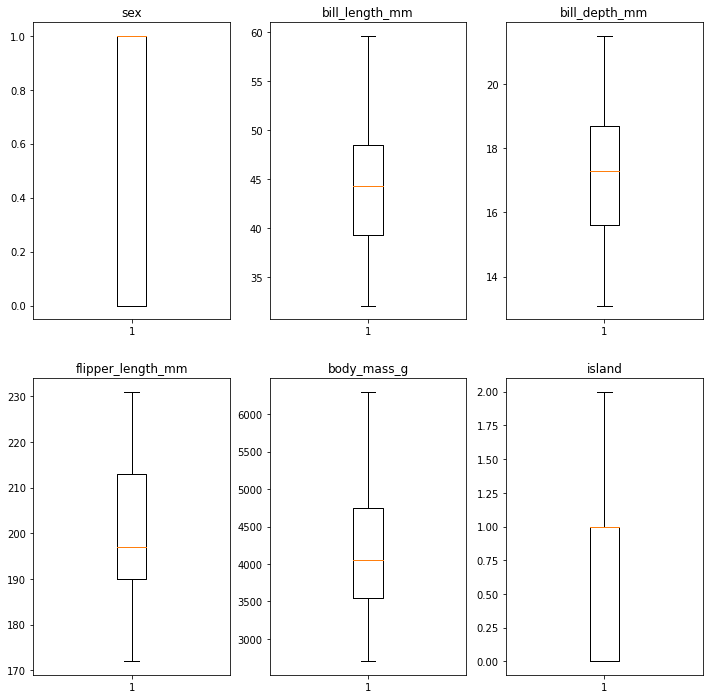

In [50]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))
count = 0

for column in dataset.columns:
    dataset[column] = dataset[column].astype(float)
    if count < 6:
        row, col = count // 3, count % 3
        axs[row][col].boxplot(dataset[column])
        axs[row][col].set_title(column)
        count += 1

plt.show()